# Salman Sabahi
# KNN- Glass Data Frame


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from collections import Counter
import itertools
import operator
import warnings
warnings.filterwarnings("ignore")

In [2]:
glass_df = pd.read_csv('./Data/glass.data.csv', header=None)
col_nam = ('Id_Number','RI', 'Na','Mg', 'Al','Si','K','Ca','Ba','Fe','Glass_Type')
glass_df.columns = col_nam
pd.options.display.max_rows = 999
glass_df.head()

,Id_Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Summarize Data

In [3]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Id_Number     214 non-null int64
RI            214 non-null float64
Na            214 non-null float64
Mg            214 non-null float64
Al            214 non-null float64
Si            214 non-null float64
K             214 non-null float64
Ca            214 non-null float64
Ba            214 non-null float64
Fe            214 non-null float64
Glass_Type    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [4]:
glass_df.dtypes

Id_Number       int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
Glass_Type      int64
dtype: object

In [5]:
glass_df['Glass_Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [6]:
glass_df.describe()

,Id_Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


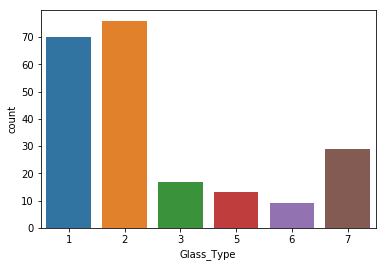

In [7]:
sns.countplot(glass_df['Glass_Type'])
plt.show()

In [8]:
# This plot shows that the number of different types is not balanced.

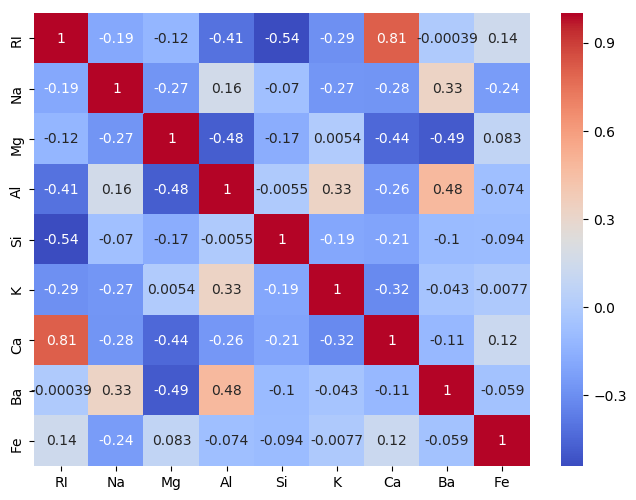

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (8,6), dpi = 100)
glass_corr_df = glass_df.iloc[:,1:-1].corr()
sns.heatmap(glass_corr_df, cmap='coolwarm',annot=True,ax=axes)

In [10]:
# Although there is a less correlation between the most of the features, there are still some correlations exist, for example
# between RI and Ca and RI and Si, Ba and Mg and so on. 

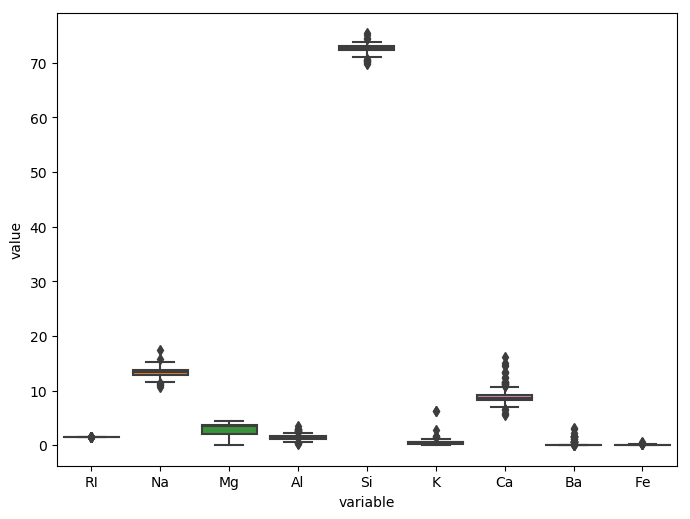

In [11]:
plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(x="variable", y="value", data=pd.melt(glass_df.iloc[:,1:-1]))
plt.show()

In [12]:
# The figure above and the statistics of the dataset show that there is a huge difference
# in the mean of the features. It seems that features needs to be standardized.In addition, some features have outliers
# which need to  be removed or corrected. 

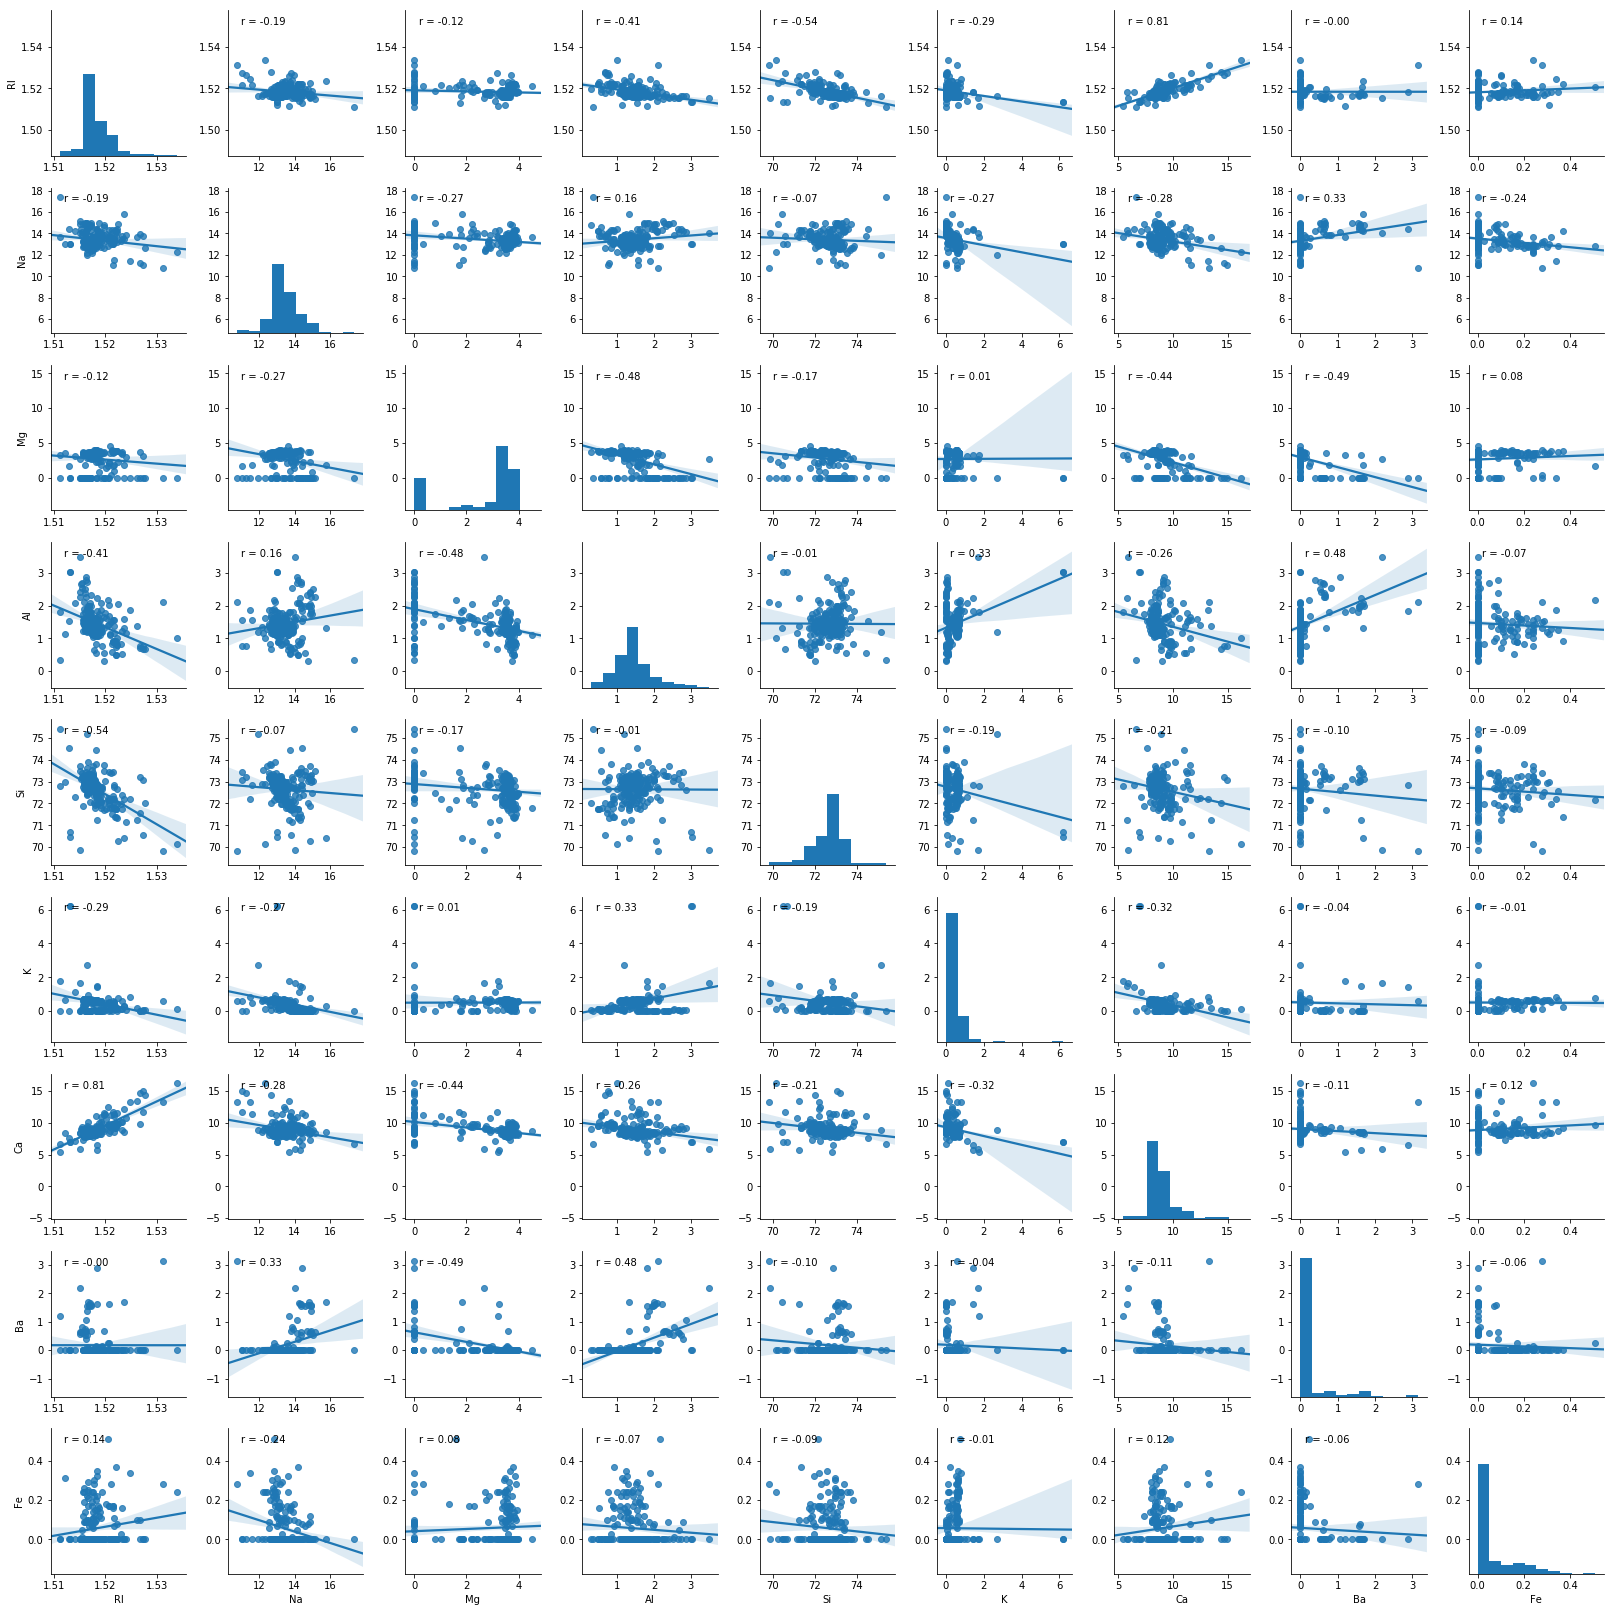

In [13]:
# To check the histograms and pairwise scatter plots:
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    r = pearsonr(x, y)[0] 
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}",xy=(.1, .9),xycoords=ax.transAxes)
    return r
sns.pairplot(glass_df.iloc[:,1:-1],kind="reg").map_offdiag(corrfunc)

In [14]:
# It is hard to say that the features have normal distribution. They have skewness.

# To check the skewness of the data:

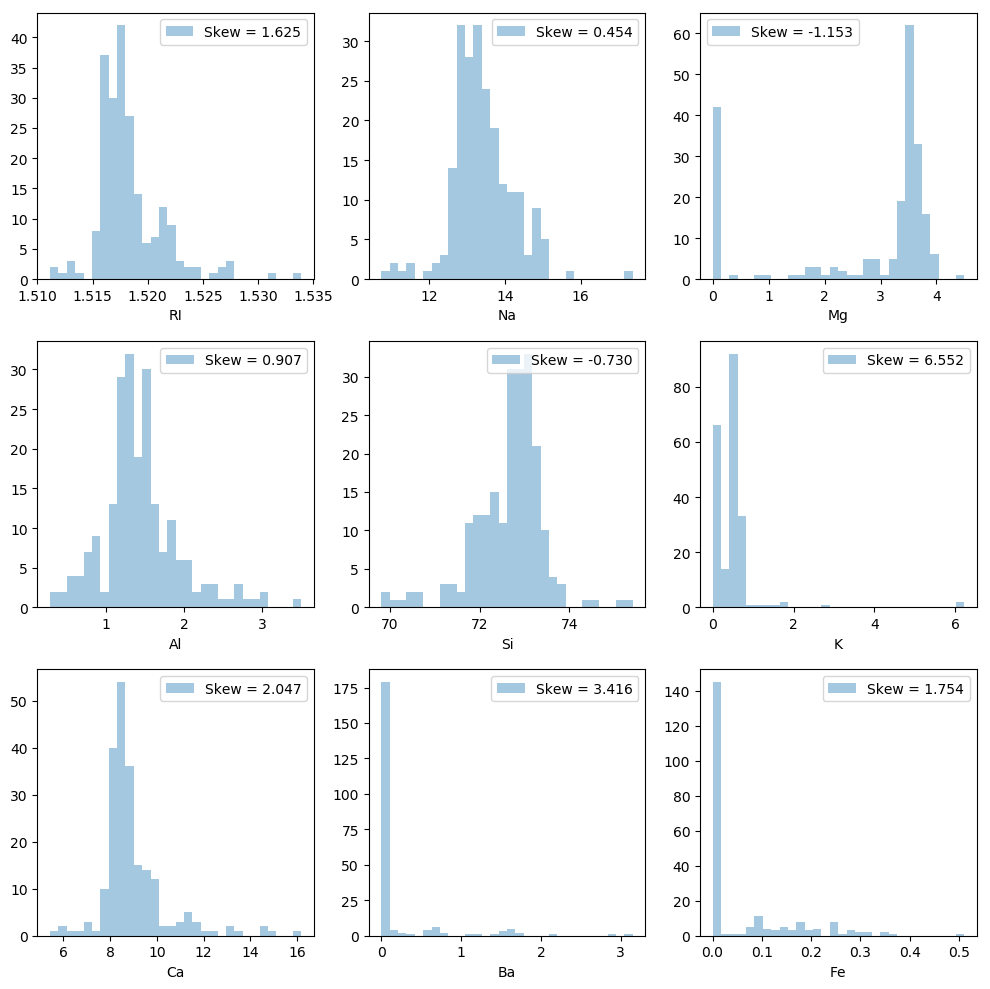

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (10,10), edgecolor='k',dpi = 100)
axes = axes.ravel()
temp_df = glass_df.iloc[:,1:-1] # temporary data frame
for i, feat in enumerate(temp_df):
    skew = temp_df[feat].skew()
    sns.distplot(temp_df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30, ax=axes[i])
    axes[i].legend(loc='best')
fig.tight_layout()

In [16]:
# Features "K" and "Na" has the most and least skewed distributions. 

# Standardize the Features

In [17]:
# According to the box plot and other statistical information obtained from the data,
# it is better to use the standardized form of the data.

In [18]:
from sklearn.preprocessing import StandardScaler
X = glass_df.iloc[:, 1:-1].values
y = glass_df.iloc[:, -1].values
# Create instance of standard scalar
scalar_X = StandardScaler()
Xst = scalar_X.fit_transform(X)

#   Train a KNN Classifier 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 51))
weight_options = ['uniform', 'distance']
p_options = [2,3,4,5]
alg = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [21]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options,p=p_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'p': [2, 3, 4, 5]}


In [22]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(Xst, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'p': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [23]:
grid_cv_results_df = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid_cv_results_df.head()

,mean_test_score,std_test_score,params
0,0.663551,0.077004,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}"
1,0.663551,0.077004,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}"
2,0.663551,0.089639,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}"
3,0.663551,0.089639,"{'n_neighbors': 1, 'p': 3, 'weights': 'distance'}"
4,0.682243,0.085980,"{'n_neighbors': 1, 'p': 4, 'weights': 'uniform'}"


In [24]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.705607476636
{'n_neighbors': 4, 'p': 3, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=3,
           weights='distance')


### Acording to the results above, using number of neighbore=4, power parameter=3 for the minkowski_distance method alonge with the weighted voting technique give the best result.

In [25]:
temp_df = pd.DataFrame(grid_cv_results_df['params'].values.tolist())
grid_cv_results_df = pd.concat([grid_cv_results_df, temp_df], axis=1)
grid_cv_results_df.drop('params',axis=1,inplace=True)
grid_cv_results_df.head()

,mean_test_score,std_test_score,n_neighbors,p,weights
0,0.663551,0.077004,1,2,uniform
1,0.663551,0.077004,1,2,distance
2,0.663551,0.089639,1,3,uniform
3,0.663551,0.089639,1,3,distance
4,0.682243,0.085980,1,4,uniform


Text(0,0.5,'Cross-Validated Accuracy')

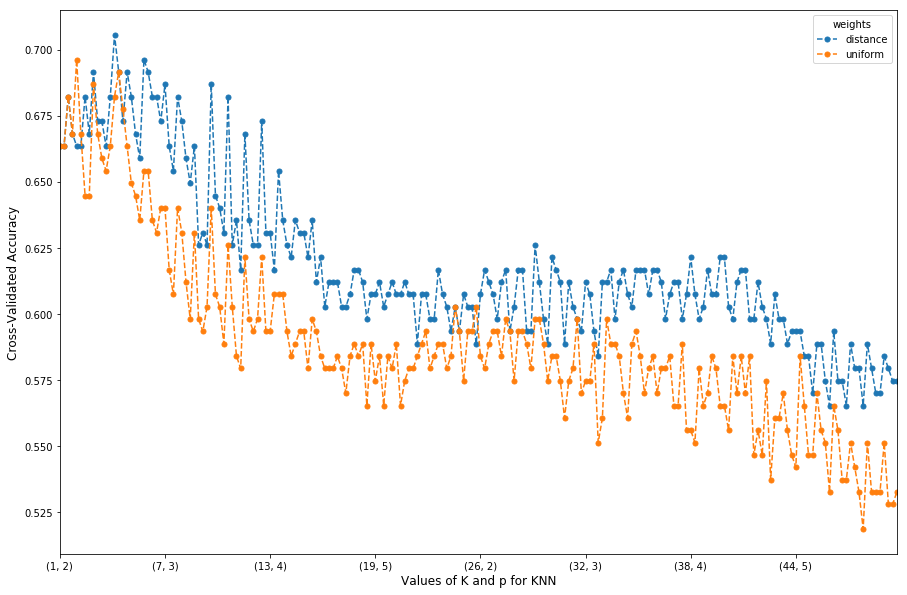

In [57]:
grid_cv_results_df.groupby(['n_neighbors','p','weights'])['mean_test_score'].mean().unstack().plot(legend=True,linestyle='dashed',\
                 marker='o', markersize=5)
plt.xlabel('Values of K and p for KNN',fontsize = 12)
plt.ylabel('Cross-Validated Accuracy',fontsize = 12)
#plt.rcParams["figure.figsize"] = (15,10)

In [27]:
# In this part, the effect of different algorithms, used in KNN classifier, on the accuracy were considered.

param_grid_new = dict(n_neighbors=k_range, weights=weight_options,p = p_options, algorithm=alg)
grid_new = GridSearchCV(knn, param_grid_new, cv=10, scoring='accuracy', return_train_score=False)
grid_new.fit(Xst, y)
print(grid_new.best_score_)
print(grid_new.best_params_)
print(grid_new.best_estimator_)

0.705607476636
{'algorithm': 'auto', 'n_neighbors': 4, 'p': 3, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=3,
           weights='distance')


In [28]:
# As can be seen, the algorithm "auto" is the best algorithm.

# Removing the Outliers

# Calculating the Features's Z-Score (Absolute Value)

In [29]:
# Although some features have skewness greater than 1 or less than -1 (highly skewed), it is still worth to 
# apply Z-score. (See the results)
# The results of features' Z-score with degree of freedom 0 is equall to the results obtained by standard scalar method.
from scipy import stats
z = np.abs(stats.zscore(glass_df.iloc[:,1:-1],ddof=0))
z
# Xst

array([[ 0.87286765,  0.28495326,  1.25463857, ...,  0.14576634,
         0.35287683,  0.5864509 ],
       [ 0.24933347,  0.59181718,  0.63616803, ...,  0.79373376,
         0.35287683,  0.5864509 ],
       [ 0.72131806,  0.14993314,  0.60142249, ...,  0.82894938,
         0.35287683,  0.5864509 ],
       ..., 
       [ 0.75404635,  1.16872135,  1.86551055, ...,  0.36410319,
         2.95320036,  0.5864509 ],
       [ 0.61239854,  1.19327046,  1.86551055, ...,  0.33593069,
         2.81208731,  0.5864509 ],
       [ 0.41436305,  1.00915211,  1.86551055, ...,  0.23732695,
         3.01367739,  0.5864509 ]])

In [30]:
# The dataframe without the outliers with the following condition
glass_df_o = glass_df[(z < 3).all(axis=1)]
# Reseting the index
glass_df_o = glass_df_o.reset_index(drop=True)

In [31]:
# number of outliers removed:
glass_df.shape[0]-glass_df_o.shape[0]

20

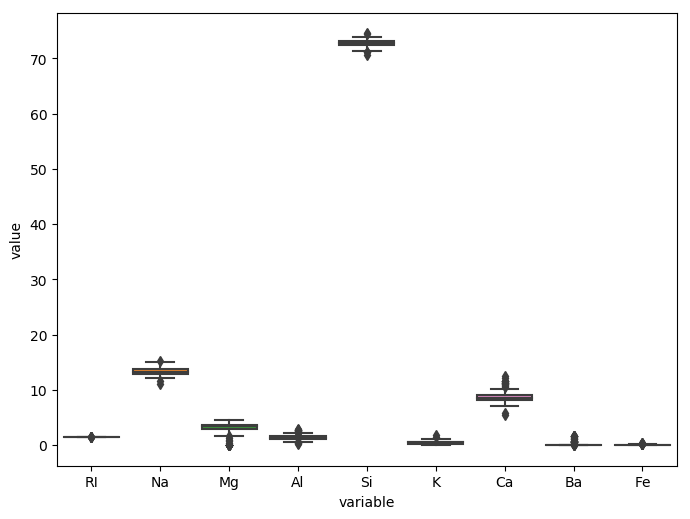

In [32]:
plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(x="variable", y="value", data=pd.melt(glass_df_o.iloc[:,1:-1]))
plt.show()

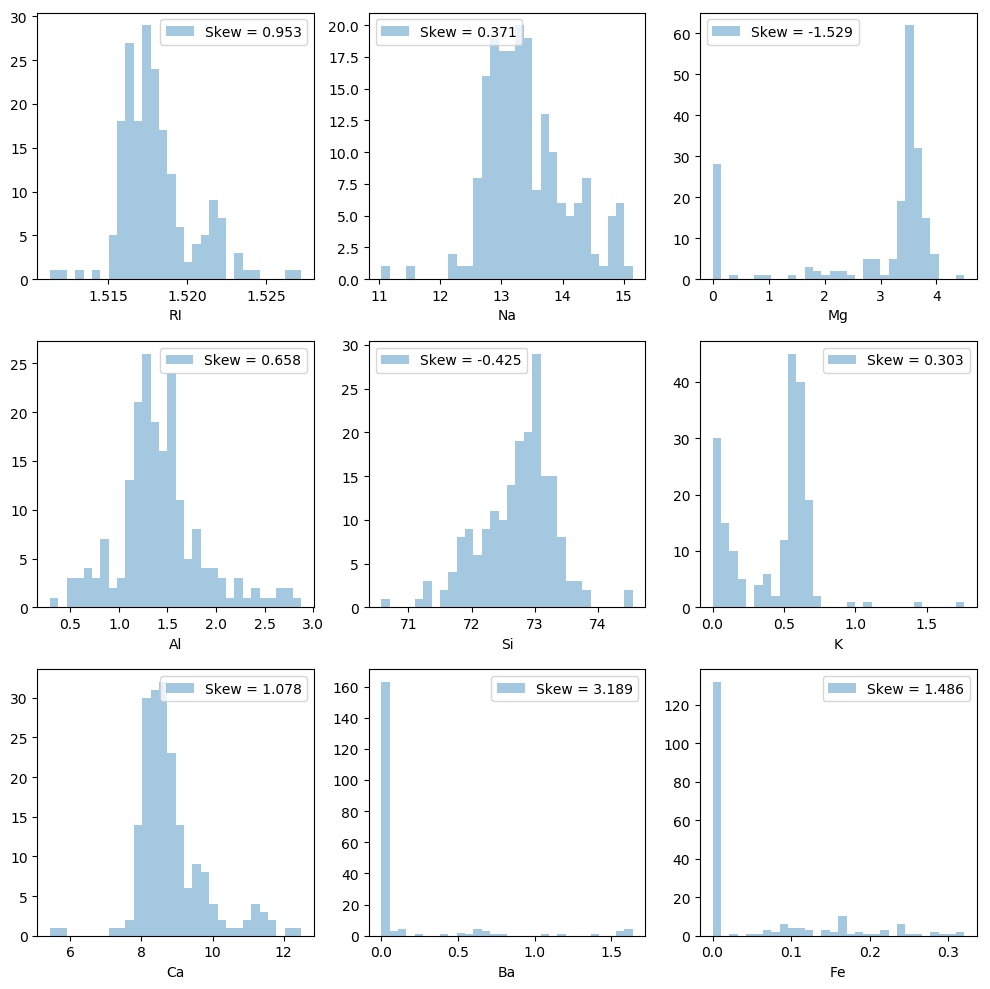

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (10,10), edgecolor='k',dpi = 100)
axes = axes.ravel()
temp_df = glass_df_o.iloc[:,1:-1] # temporary data frame
for i, feat in enumerate(temp_df):
    skew = temp_df[feat].skew()
    sns.distplot(temp_df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30, ax=axes[i])
    axes[i].legend(loc='best')
fig.tight_layout()

# GridSearchCV for Features without the Outliers 

In [34]:
knn = KNeighborsClassifier()
X_o = glass_df_o.iloc[:, 1:-1].values
y_o = glass_df_o.iloc[:, -1].values
Xst_o = scalar_X.fit_transform(X_o)

In [35]:
# instantiate and fit the grid
grid_o = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid_o.fit(Xst_o, y_o)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'p': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [36]:
grid_cv_results_df_o = pd.DataFrame(grid_o.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid_o.best_score_)
print(grid_o.best_params_)
print(grid_o.best_estimator_)

0.731958762887
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')


In [37]:
# In this case the Euclidean method with number of neighbors 3 and the weighted voting technique (distsnce)
# give the best results.

# Confusion Matrix-Original Data

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.rcParams["figure.figsize"] = (8,6)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
   
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    plt.tight_layout()

In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics



knn = KNeighborsClassifier(n_neighbors=4,weights='distance',p=3)
y_pred = cross_val_predict(knn, Xst, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

target_names = ['class 1', 'class 2', 'class 3','class 5','class 6','class 7']
print(classification_report(y, y_pred, target_names=target_names))
#metrics.accuracy_score(y, y_pred)

             precision    recall  f1-score   support

    class 1       0.70      0.83      0.76        70
    class 2       0.68      0.66      0.67        76
    class 3       0.33      0.18      0.23        17
    class 5       0.60      0.69      0.64        13
    class 6       0.88      0.78      0.82         9
    class 7       0.92      0.83      0.87        29

avg / total       0.70      0.71      0.70       214



Confusion matrix, without normalization
[[58 10  2  0  0  0]
 [16 50  4  5  1  0]
 [ 7  7  3  0  0  0]
 [ 0  3  0  9  0  1]
 [ 0  1  0  0  7  1]
 [ 2  2  0  1  0 24]]


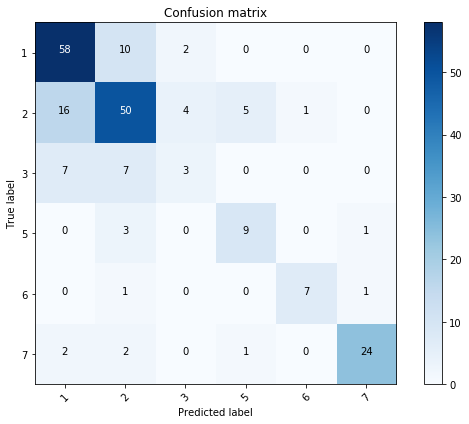

In [59]:
plot_confusion_matrix(cm = conf_mat,normalize=False, classes=glass_df['Glass_Type'].unique(),\
                     title='Confusion matrix',cmap=plt.cm.Blues)

# Confusion Matrix- Data without Outliers

In [41]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
y_pred_o = cross_val_predict(knn, Xst_o, y_o, cv=10)
conf_mat_o = confusion_matrix(y_o, y_pred_o)

target_names = ['class 1', 'class 2', 'class 3','class 5','class 6','class 7']
print(classification_report(y_o, y_pred_o, target_names=target_names))

             precision    recall  f1-score   support

    class 1       0.71      0.80      0.75        70
    class 2       0.71      0.69      0.70        68
    class 3       0.46      0.38      0.41        16
    class 5       0.88      0.78      0.82         9
    class 6       0.86      0.75      0.80         8
    class 7       0.95      0.87      0.91        23

avg / total       0.73      0.73      0.73       194



Confusion matrix, without normalization
[[56 10  4  0  0  0]
 [16 47  3  1  1  0]
 [ 6  4  6  0  0  0]
 [ 0  2  0  7  0  0]
 [ 0  1  0  0  6  1]
 [ 1  2  0  0  0 20]]


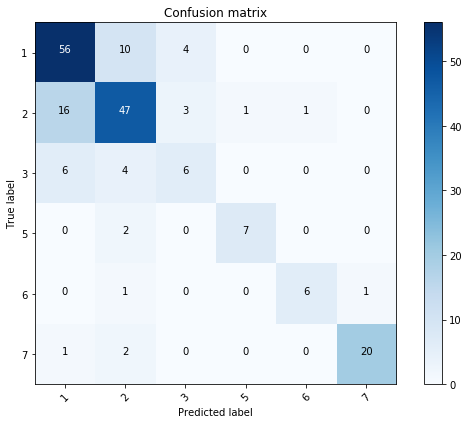

In [42]:
plot_confusion_matrix(cm = conf_mat_o,normalize=False, classes=glass_df['Glass_Type'].unique(),\
                     title='Confusion matrix',cmap=plt.cm.Blues)

### In both cases (outliers and without outliers), the KNN can classify class 7  with the highest precision (How precise the KNN in predicting class 7) and recall (How sensitive the KNN in detecting class 7 ). The lowest precision and recall belong to class 3.


### Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions.

### Threshold can be adjusted to increase sensitivity or specificity. That's why ROC curves are needed.


# Receiver Operating Characteristic (ROC) Curve

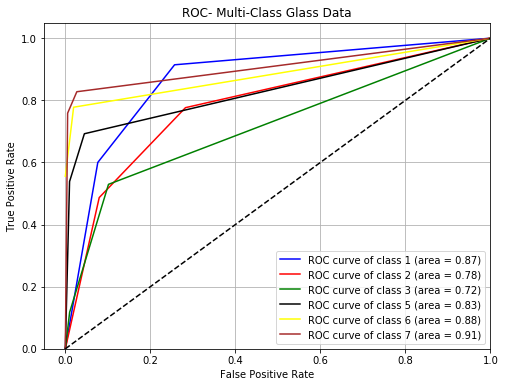

In [43]:
# Run classifier with cross-validation and plot ROC curves

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline

X = glass_df.iloc[:, 1:-1].values
y = glass_df.iloc[:, -1].values

# In this section pipeline method is used. However, it is not a must.
pipe = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=2,weights='uniform'))])



# Binarize the output; one for the class of interest while the rest classes are labeled as zero.
classes=[1, 2, 3, 5, 6, 7]
y_bin = label_binarize(y, classes)
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipe, X, y, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green','black','yellow','brown'])

for i, color in enumerate(zip((classes), colors)):
    plt.plot(fpr[i], tpr[i], color=color[1],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(color[0], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- Multi-Class Glass Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [44]:
# The maximum and minimum AUCs are for class 7 and 3 respectively. This result is in consistent with the 
# result obtained from the confusion matrix.

# Applying Principle Component Analysis

### As mentioned above some of the features are correlated. This can affect the prediction and KNN model. Therefore, PCA thechnique will be applied.

In [45]:
# PCA was applied to the data without outliers.

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
p_Components = pca.fit_transform(Xst_o)
p_df = pd.DataFrame(data = p_Components, columns = ['PC_1', 'PC_2','PC_3','PC_4','PC_5'])

p_df = pd.concat([p_df, glass_df_o['Glass_Type']],axis=1)
p_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,Glass_Type
0,-0.979129,2.012941,1.545450,-0.112763,-0.438636,1
1,-0.204857,-0.500319,1.113255,-0.347796,-0.636042,1
2,0.041099,-1.127119,0.623669,-0.483126,-0.838621,1
3,-0.836673,-0.526921,0.624096,-0.589193,-0.095145,1
4,-0.636025,-0.867047,0.281561,-0.678216,-0.619960,1


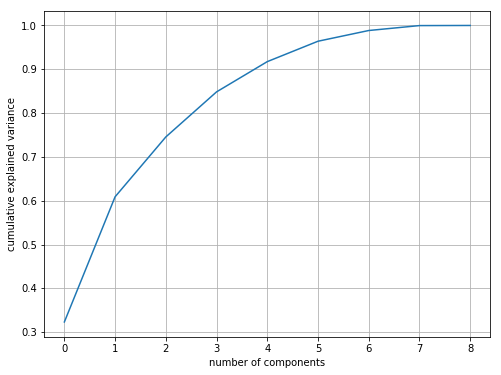

In [60]:
pca = PCA().fit(Xst_o.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)

In [47]:
# Using 5 components describe about 95 percent of the data.
X_pca = p_df.iloc[:, 1:-1].values
y_pca = p_df.iloc[:, -1].values

# GridSearchCV for PCs 

In [48]:
# define the parameter values that should be searched
k_range = list(range(1, 51))
weight_options = ['uniform', 'distance']
p_options = [2,3,4,5]

In [49]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_pc = dict(n_neighbors=k_range, weights=weight_options,p = p_options)
print(param_grid_pc)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'p': [2, 3, 4, 5]}


In [50]:
# instantiate and fit the grid
knn = KNeighborsClassifier()
grid_pca = GridSearchCV(knn, param_grid_pc, cv=10, scoring='accuracy', return_train_score=False)
grid_pca.fit(X_pca, y_pca)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'p': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [51]:
grid.cv_results_pc_df = pd.DataFrame(grid_pca.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid.cv_results_pc_df

,mean_test_score,std_test_score,params
0,0.561856,0.108431,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}"
1,0.561856,0.108431,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}"
2,0.567010,0.119708,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}"
3,0.567010,0.119708,"{'n_neighbors': 1, 'p': 3, 'weights': 'distance'}"
4,0.561856,0.100486,"{'n_neighbors': 1, 'p': 4, 'weights': 'uniform'}"
5,0.561856,0.100486,"{'n_neighbors': 1, 'p': 4, 'weights': 'distance'}"
6,0.556701,0.092896,"{'n_neighbors': 1, 'p': 5, 'weights': 'uniform'}"
7,0.556701,0.092896,"{'n_neighbors': 1, 'p': 5, 'weights': 'distance'}"
8,0.582474,0.082848,"{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}"
9,0.561856,0.108431,"{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}"


In [52]:
# examine the best model
print(grid_pca.best_score_)
print(grid_pca.best_params_)
print(grid_pca.best_estimator_)

0.634020618557
{'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=3,
           weights='uniform')


In [53]:
# It seems that making prediction with using only 5 PCs do not improve the accuracy. More components are needed. 
# Also,it is concluded that the correlations exist between some features do not affect the accuracy of our KNN model too much. 